# Hourly Electricity Consumption and Production

##### DateTime : The day and hour of the data.
##### Consumption : The electricity consumption for that hour.
##### Production : The (total) electricity production for that hour.
##### Nuclear : The electricity produced by nuclear means for that hour, in MWs.
##### Wind : The electricity produced by wind means for that hour, in MWs.
##### Hydroelectric : The electricity produced by hydroelectric means for that hour, in MWs.
##### Oil and Gas ; The electricity produced with oil and gas for that hour, in MWs.
##### Coal : The electricity produced with coal for that hour, in MWs.
##### Solar : The electricity produced by solar means for that hour, in MWs.
###### Biomass : The electricity produced with biomass for that hour, in MWs.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

In [3]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB


In [5]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [6]:
df.tail()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61
36771,2023-03-12 23:00:00,5409,5900,1403,0,2492,914,1030,0,60


In [7]:
df.describe()


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000
mean,6707.924889,6543.770478,1293.468590,785.700723,1801.603149,1181.630017,1270.038236,151.524094,58.730828
std,1034.961146,1005.486125,237.348752,681.508967,678.981785,422.487653,306.550193,222.768784,13.363835
min,4081.000000,3315.000000,612.000000,-26.000000,175.000000,213.000000,279.000000,0.000000,18.000000
25%,5895.750000,5833.000000,1349.000000,226.000000,1310.000000,881.000000,1080.000000,0.000000,49.000000
50%,6686.000000,6492.000000,1386.000000,577.000000,1708.000000,1216.000000,1254.000000,2.000000,61.000000
75%,7434.000000,7210.000000,1409.000000,1195.250000,2184.000000,1502.000000,1467.000000,268.000000,68.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4359.000000,2141.000000,2537.000000,869.000000,89.000000


In [8]:
df.columns

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [9]:
df.keys()

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [10]:
df['Date'] = df['DateTime'].apply(lambda date: date.split(' ')[0])
df['Time'] = df['DateTime'].apply(lambda time: time.split(' ')[1])


In [11]:
df.dtypes

DateTime         object
Consumption       int64
Production        int64
Nuclear           int64
Wind              int64
Hydroelectric     int64
Oil and Gas       int64
Coal              int64
Solar             int64
Biomass           int64
Date             object
Time             object
dtype: object

In [12]:
df["DateTime"]= pd.to_datetime(df["DateTime"])
df["Date"]= pd.to_datetime(df["Date"])
df.dtypes

DateTime         datetime64[ns]
Consumption               int64
Production                int64
Nuclear                   int64
Wind                      int64
Hydroelectric             int64
Oil and Gas               int64
Coal                      int64
Solar                     int64
Biomass                   int64
Date             datetime64[ns]
Time                     object
dtype: object

<Axes: >

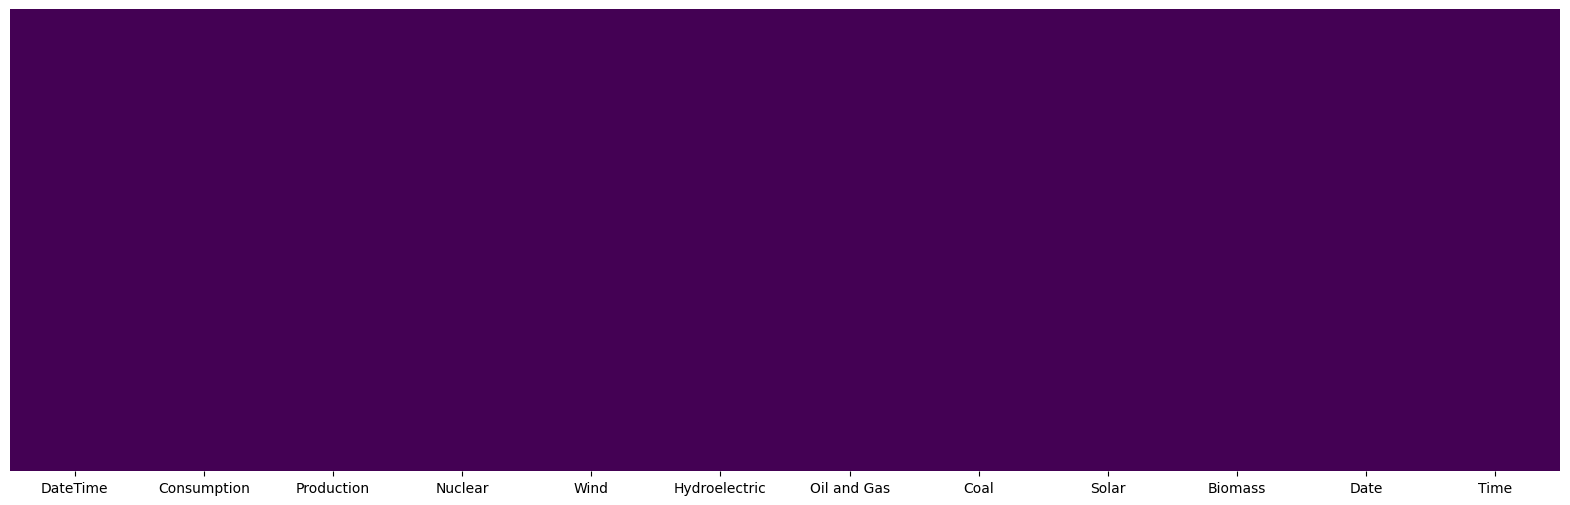

In [14]:
sns.heatmap(df.isnull() , yticklabels = False ,  cbar=False , cmap = "viridis")

# there is no NA value in dataset

## Exploratory data analysis

In [15]:
df.corr()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
Consumption,1.000000,0.732282,0.124541,0.091779,0.371311,0.509918,0.434893,0.174150,0.334124
Production,0.732282,1.000000,0.106552,0.516937,0.449501,0.451766,0.328335,0.123323,0.272738
Nuclear,0.124541,0.106552,1.000000,0.118649,-0.406881,0.233989,-0.015764,-0.145087,0.264480
Wind,0.091779,0.516937,0.118649,1.000000,-0.187258,0.025437,-0.158186,-0.120268,0.134089
Hydroelectric,0.371311,0.449501,-0.406881,-0.187258,1.000000,-0.124115,0.055678,0.150180,-0.075001
Oil and Gas,0.509918,0.451766,0.233989,0.025437,-0.124115,1.000000,0.247594,-0.172778,0.431457
Coal,0.434893,0.328335,-0.015764,-0.158186,0.055678,0.247594,1.000000,-0.032569,0.002068
Solar,0.174150,0.123323,-0.145087,-0.120268,0.150180,-0.172778,-0.032569,1.000000,-0.113577
Biomass,0.334124,0.272738,0.264480,0.134089,-0.075001,0.431457,0.002068,-0.113577,1.000000


In [16]:
df.max()

DateTime         2023-03-12 23:00:00
Consumption                     9615
Production                      9886
Nuclear                         1457
Wind                            2811
Hydroelectric                   4359
Oil and Gas                     2141
Coal                            2537
Solar                            869
Biomass                           89
Date             2023-03-12 00:00:00
Time                        23:00:00
dtype: object

<Axes: >

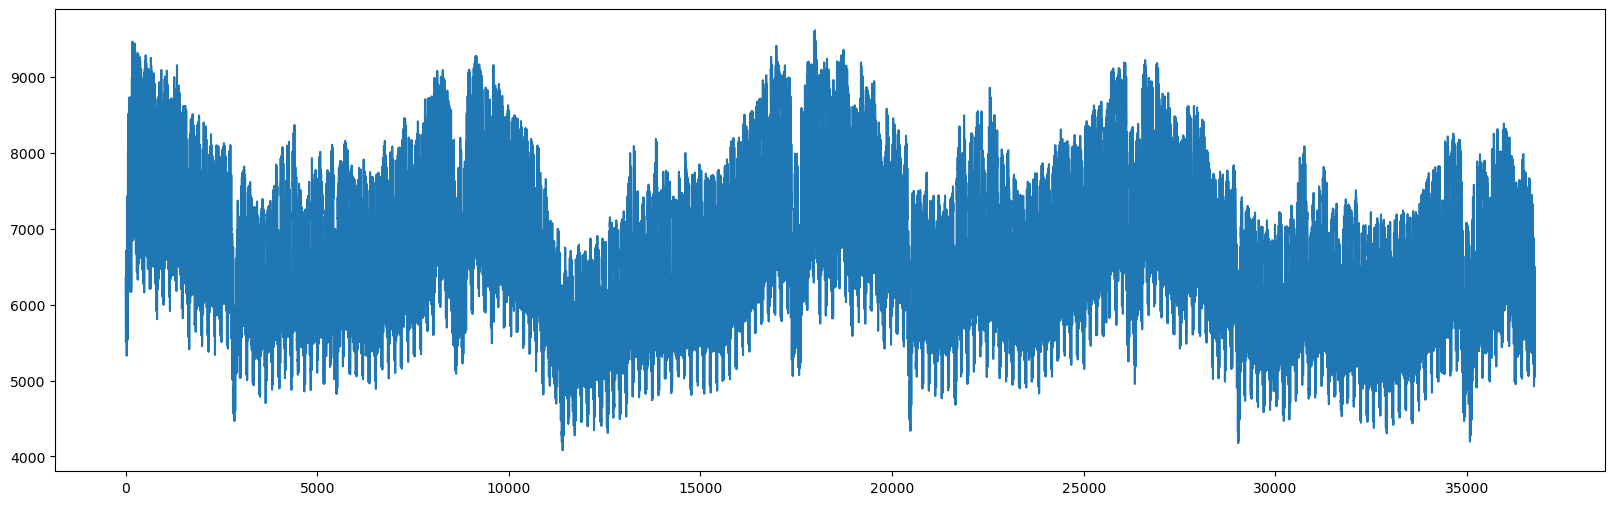

In [17]:
df["Consumption"].plot()

<Axes: xlabel='Consumption', ylabel='Oil and Gas'>

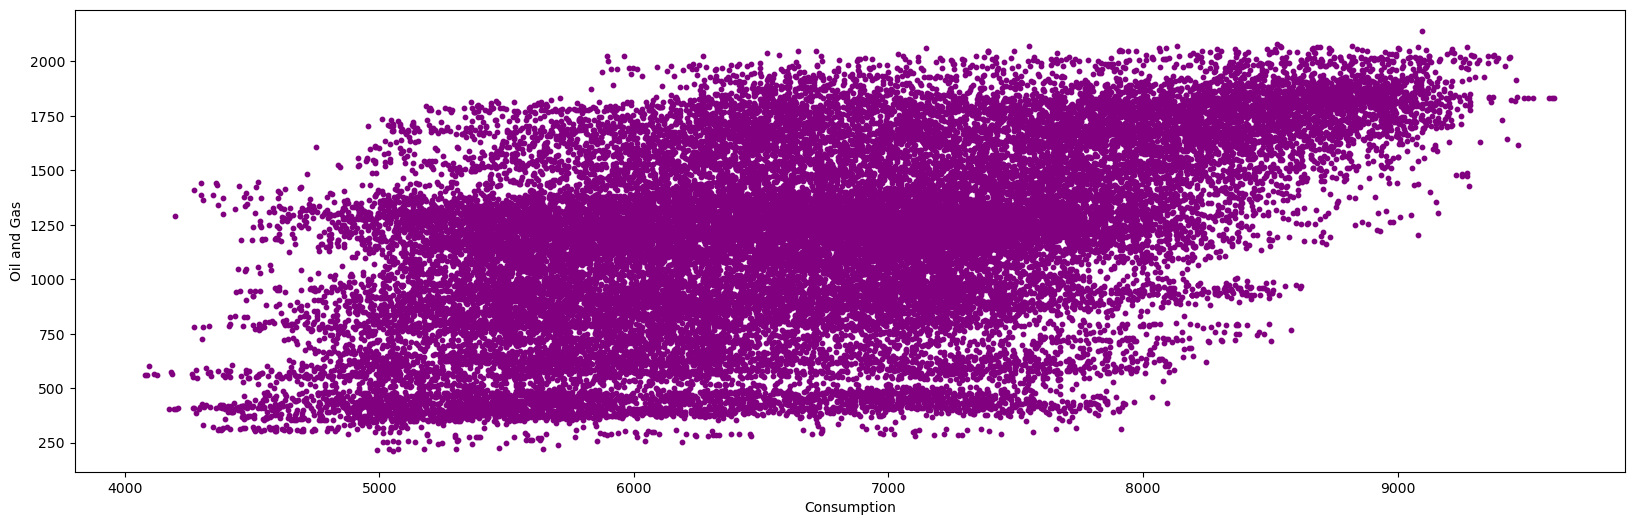

In [18]:
df.plot.scatter(x= "Consumption" , y = "Oil and Gas" , c="purple" , s =10 )

<Axes: >

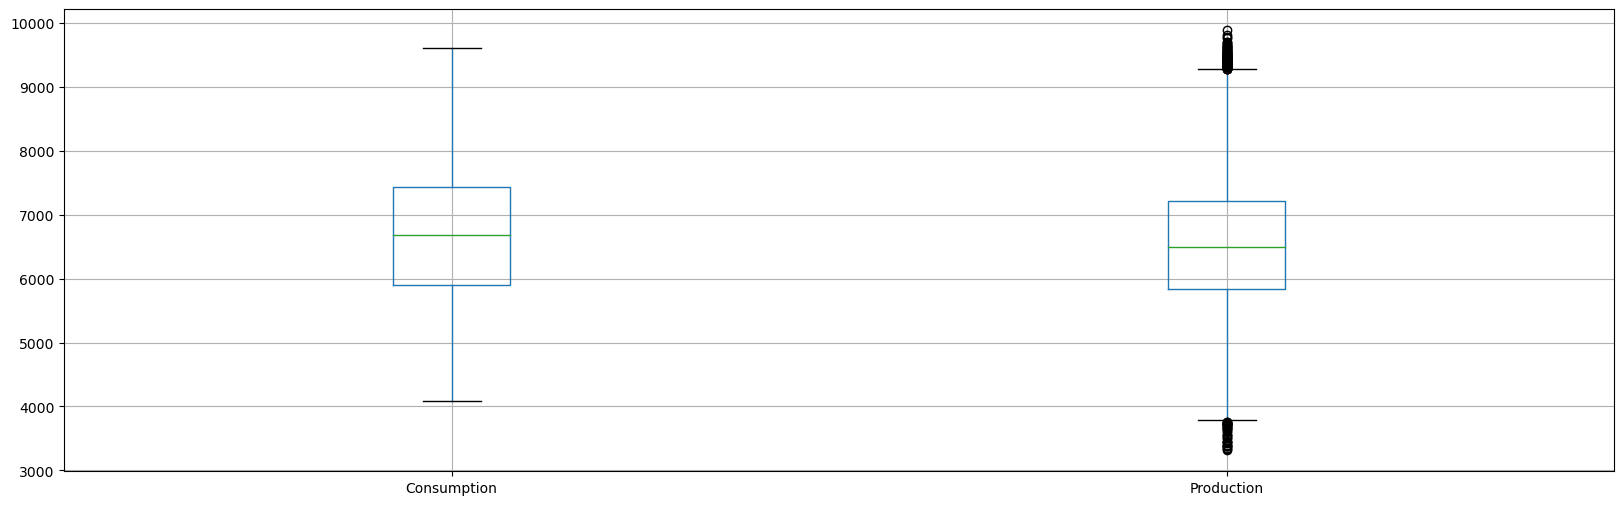

In [19]:
df[["Consumption" , "Production"]].boxplot()

<Axes: >

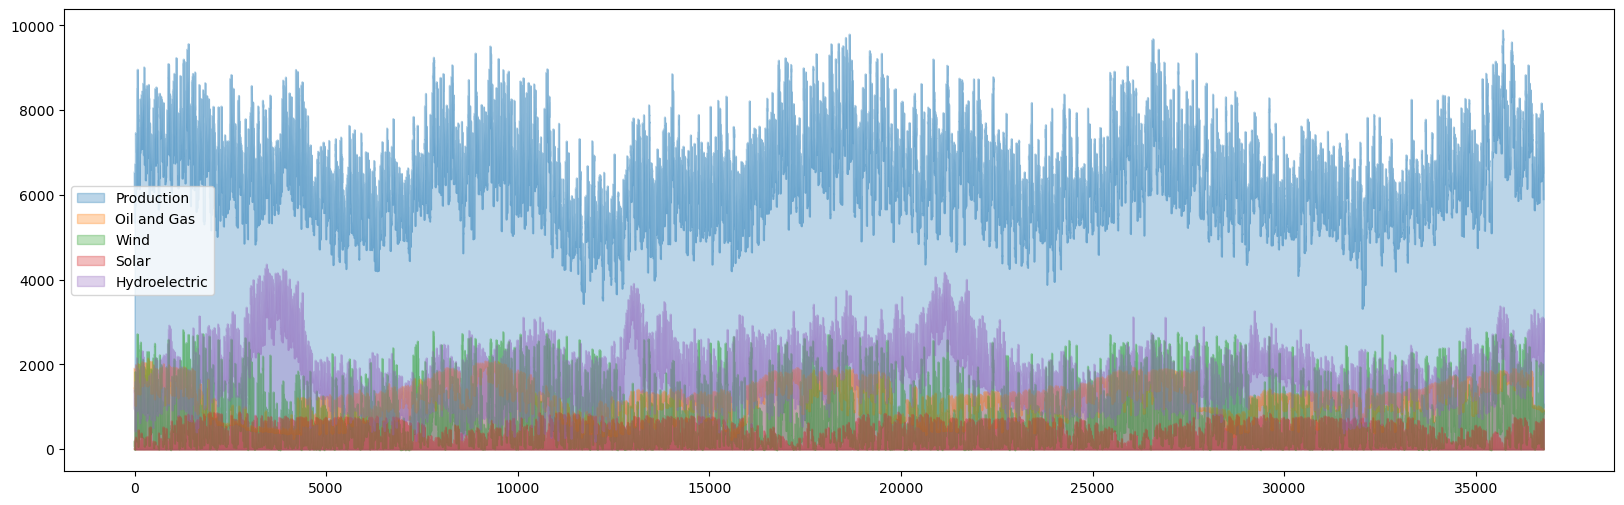

In [20]:
df[["Production" , "Oil and Gas" , "Wind" , "Solar" , "Hydroelectric"]].loc[:].plot.area(stacked=False , alpha=0.3)

In [21]:
df.sort_values(by='Consumption',ascending=False).head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time
17988,2021-01-19 10:00:00,9615,8034,1408,51,2777,1834,1709,181,73,2021-01-19,10:00:00
17987,2021-01-19 09:00:00,9604,7893,1411,34,2746,1833,1686,106,76,2021-01-19,09:00:00
17964,2021-01-18 10:00:00,9594,8402,1361,252,2984,1833,1653,233,83,2021-01-18,10:00:00
17965,2021-01-18 11:00:00,9531,8524,1351,245,3041,1834,1687,280,83,2021-01-18,11:00:00
17963,2021-01-18 09:00:00,9513,8293,1402,322,2889,1833,1667,93,84,2021-01-18,09:00:00


In [22]:
df.sort_values(by='Production',ascending=False).head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time
35709,2023-01-27 17:00:00,7940,9886,1363,2588,3016,1812,1038,0,68,2023-01-27,17:00:00
35710,2023-01-27 18:00:00,8046,9816,1386,2578,2937,1813,1031,0,70,2023-01-27,18:00:00
18660,2021-02-16 10:00:00,9177,9787,1340,1301,3418,1716,1561,373,74,2021-02-16,10:00:00
35711,2023-01-27 19:00:00,7950,9773,1386,2570,2963,1807,976,0,70,2023-01-27,19:00:00
18563,2021-02-12 09:00:00,9194,9707,1395,1544,3197,1748,1577,171,74,2021-02-12,09:00:00


In [24]:
df = df.set_index("DateTime")

In [25]:
df_year = df["2022-01-01 00:00:00" : "2022-12-31 23:59:59"]
df_year

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time
DateTime,,,,,,,,,,,
2022-01-01 00:00:00,6120,6126,1417,1136,1405,1091,1022,0,56,2022-01-01,00:00:00
2022-01-01 01:00:00,5923,6276,1421,1124,1482,1157,1036,0,56,2022-01-01,01:00:00
2022-01-01 02:00:00,5630,6298,1420,921,1618,1231,1050,0,56,2022-01-01,02:00:00
2022-01-01 03:00:00,5408,6199,1422,666,1742,1255,1058,0,56,2022-01-01,03:00:00
2022-01-01 04:00:00,5296,6215,1422,877,1633,1206,1019,0,58,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,6557,6782,1405,715,2211,1528,888,0,33,2022-12-31,19:00:00
2022-12-31 20:00:00,6335,6779,1406,745,2171,1535,888,0,34,2022-12-31,20:00:00
2022-12-31 21:00:00,5728,6430,1410,841,1804,1505,835,0,34,2022-12-31,21:00:00


<Axes: xlabel='DateTime', ylabel='Electricity Consumption'>

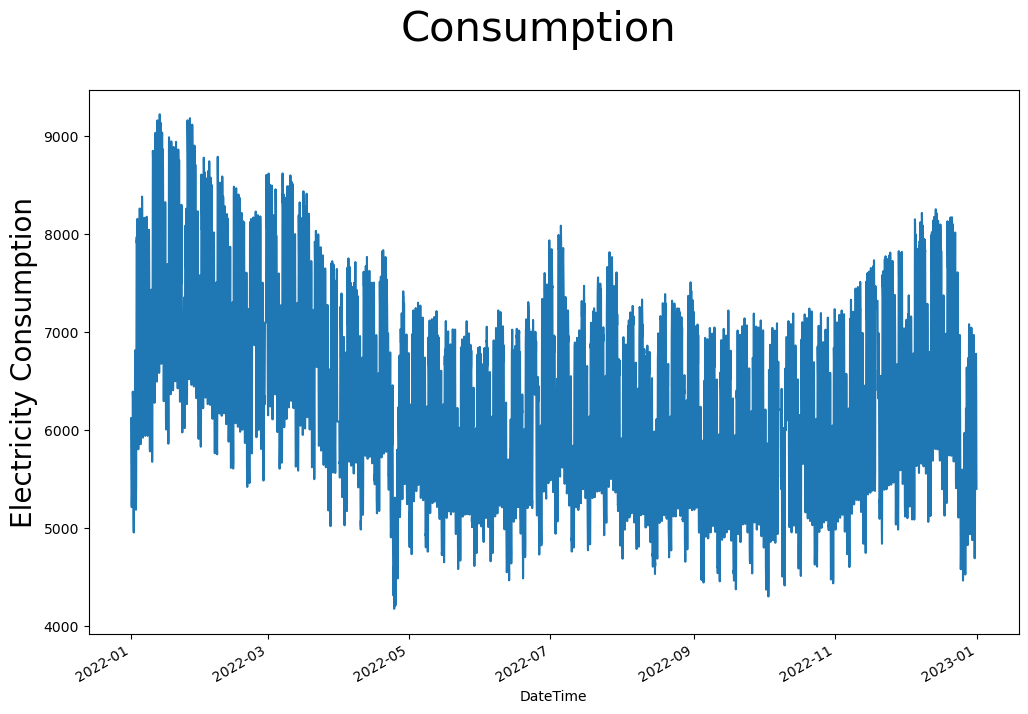

In [27]:
plt.suptitle('Consumption', fontsize='30')
#plt.xlabel('Time', fontsize ='20')
plt.ylabel('Electricity Consumption', fontsize='20')
#plt.plot(df['Consumption'].values)
df_year['Consumption'].plot(style="-", figsize=(12, 8))

# Matrix Profile


In [28]:
import stumpy

## Motif Detection 

In [29]:
for column in df.columns:
    int_columns = df.select_dtypes(include=['int']).columns
    df[int_columns] = df[int_columns].astype(float)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36772 entries, 2019-01-01 00:00:00 to 2023-03-12 23:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Consumption    36772 non-null  float64       
 1   Production     36772 non-null  float64       
 2   Nuclear        36772 non-null  float64       
 3   Wind           36772 non-null  float64       
 4   Hydroelectric  36772 non-null  float64       
 5   Oil and Gas    36772 non-null  float64       
 6   Coal           36772 non-null  float64       
 7   Solar          36772 non-null  float64       
 8   Biomass        36772 non-null  float64       
 9   Date           36772 non-null  datetime64[ns]
 10  Time           36772 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 4.4+ MB


In [30]:
m = 365 #15days
mp = stumpy.stump(df['Consumption'], m)
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 16923


In [31]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 25660


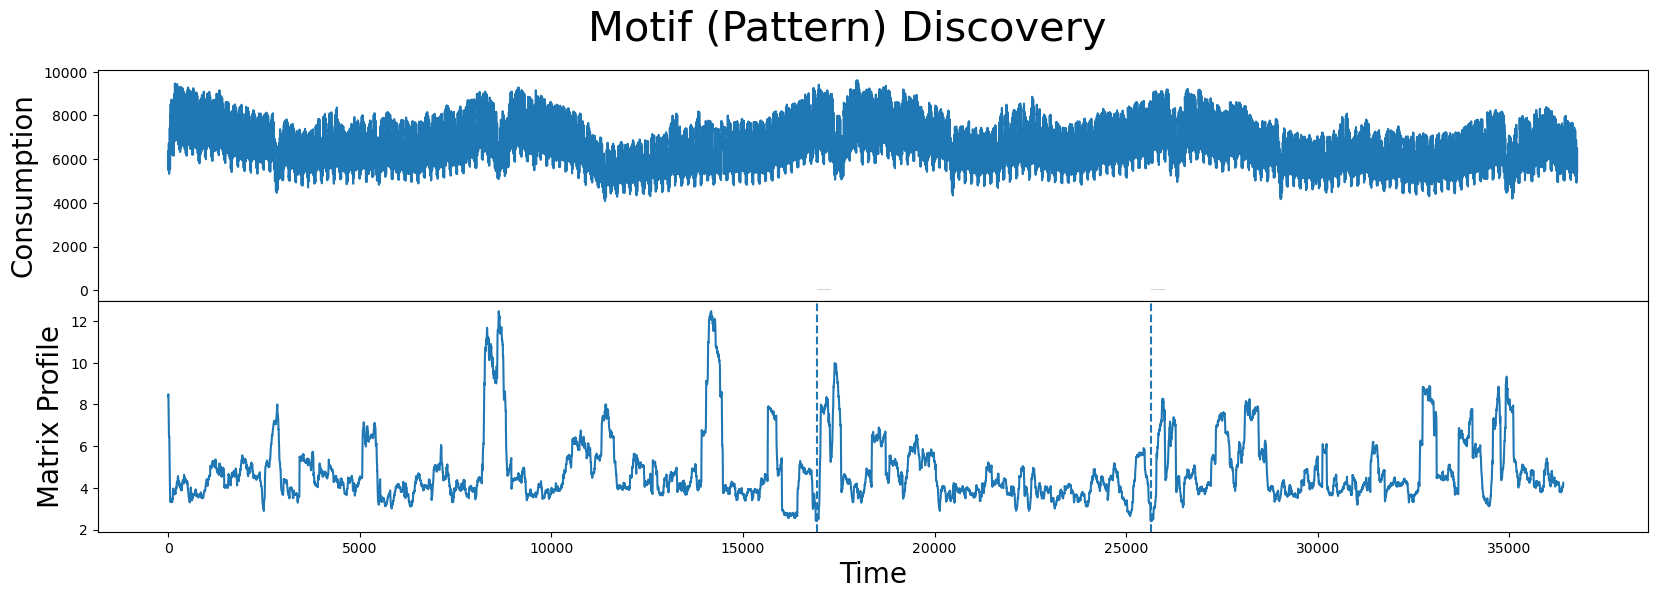

In [32]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
axs[0].plot(df['Consumption'].values)
axs[0].set_ylabel('Consumption', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])


## Anomaly Detection 

In [33]:
m = 365 #15 days
mp = stumpy.stump(df['Consumption'], m)
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")


The discord is located at index 14167


In [34]:
nearest_neighbor_idx = mp[discord_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 13999


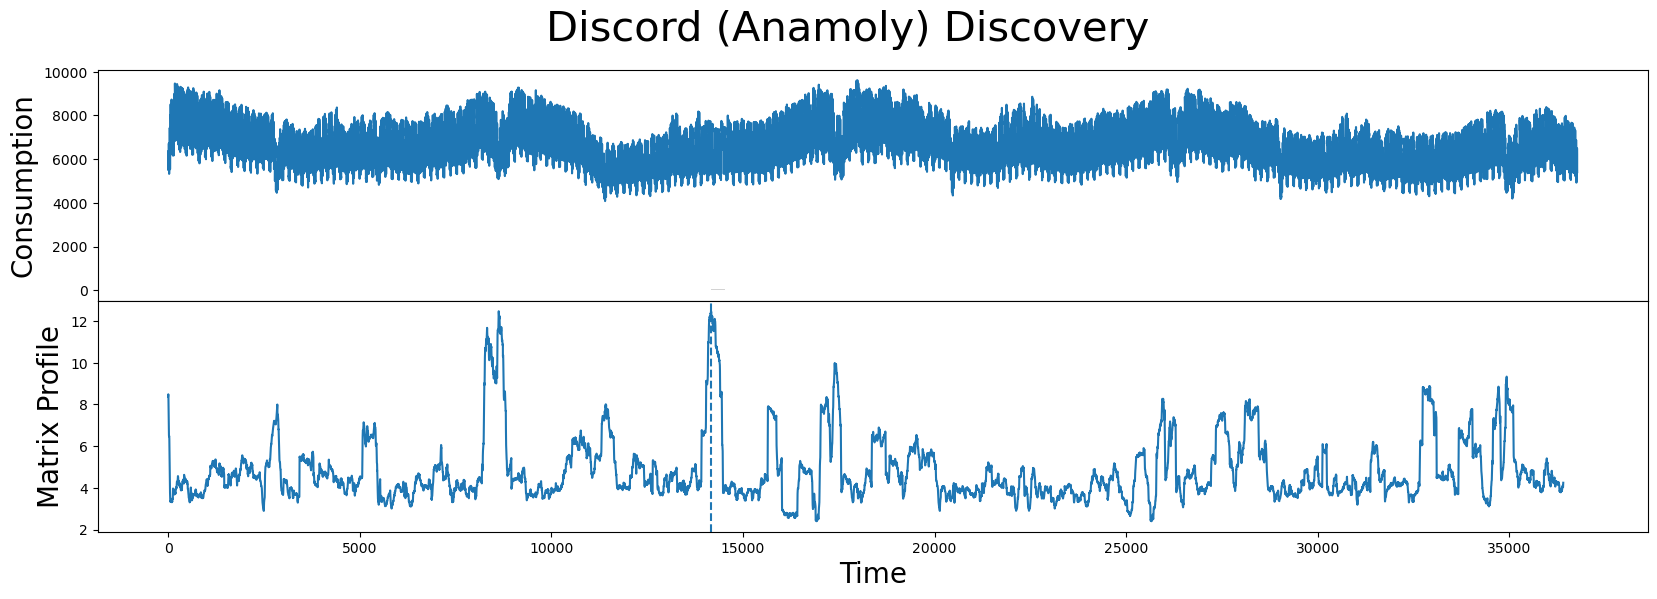

In [35]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anamoly) Discovery', fontsize='30')
axs[0].plot(df['Consumption'].values)
axs[0].set_ylabel('Consumption', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])

## Multi-Dimensional MP  -- Motif


In [36]:
dfm =df[['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric',
       'Oil and Gas', 'Coal', 'Solar', 'Biomass']]

In [37]:
dfplt = df[['Consumption', 'Production', 'Oil and Gas']]
columns= dfplt.columns

In [38]:
columns= dfplt.columns
columns


Index(['Consumption', 'Production', 'Oil and Gas'], dtype='object')

In [39]:
m = 365 #15 days
mps = {}  
motifs_idx = {}  
for dim_name in dfm.columns:
    mps[dim_name] = stumpy.stump(dfm[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")

The motif pair matrix profile value in Consumption is 2.4
The motif pair matrix profile value in Production is 7.8
The motif pair matrix profile value in Nuclear is 0.7
The motif pair matrix profile value in Wind is 11.0
The motif pair matrix profile value in Hydroelectric is 8.2
The motif pair matrix profile value in Oil and Gas is 6.4
The motif pair matrix profile value in Coal is 9.3
The motif pair matrix profile value in Solar is 2.0
The motif pair matrix profile value in Biomass is 6.2


In [40]:
list(mps.keys())


['Consumption',
 'Production',
 'Nuclear',
 'Wind',
 'Hydroelectric',
 'Oil and Gas',
 'Coal',
 'Solar',
 'Biomass']

In [41]:
m = 720 #one month
mps = {}  
motifs_idx = {}  
for dim_name in dfplt.columns:
    mps[dim_name] = stumpy.stump(dfm[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")

The motif pair matrix profile value in Consumption is 5.4
The motif pair matrix profile value in Production is 13.6
The motif pair matrix profile value in Oil and Gas is 11.9


In [42]:
#2022
x_min = pd.Timestamp('2022-01-01')
x_max = pd.Timestamp('2022-06-30')

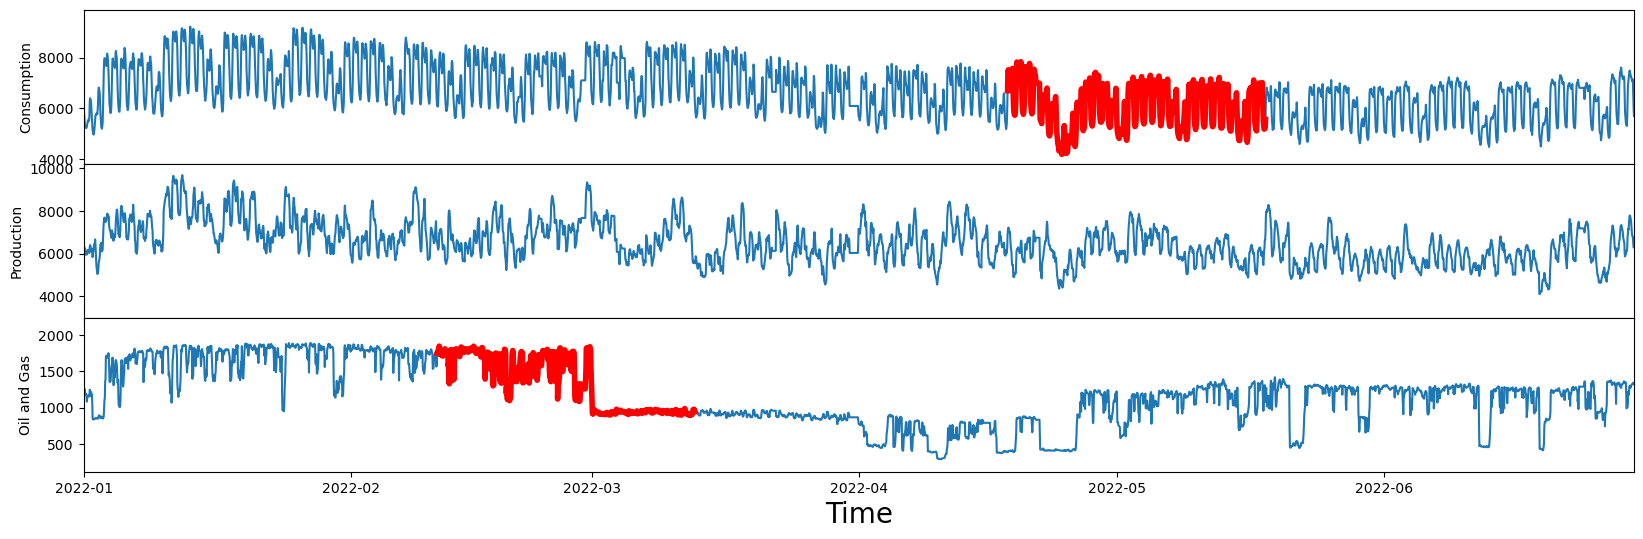

In [43]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='10')
    axs[i].plot(dfplt[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].set_xlim(x_min, x_max)
    for idx in motifs_idx[dim_name]:
        axs[i].plot(dfm[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')
plt.show()

## Multi-Dimensional MP  -- Anomaly

In [44]:
#2022
x_min = pd.Timestamp('2022-01-01')
x_max = pd.Timestamp('2023-03-12')

In [45]:
m = 365 #15 days
mps = {}  
discords_idx = {}  
for dim_name in dfm.columns:
    mps[dim_name] = stumpy.stump(dfm[dim_name], m)
    discords_distance = np.round(mps[dim_name][:, 0].max(), 1)
    discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]
    print(f"The discords pair matrix profile value in {dim_name} is {discords_distance}")

The discords pair matrix profile value in Consumption is 12.5
The discords pair matrix profile value in Production is 18.1
The discords pair matrix profile value in Nuclear is 20.4
The discords pair matrix profile value in Wind is 20.8
The discords pair matrix profile value in Hydroelectric is 17.8
The discords pair matrix profile value in Oil and Gas is 22.0
The discords pair matrix profile value in Coal is 21.7
The discords pair matrix profile value in Solar is 13.2
The discords pair matrix profile value in Biomass is 21.4


In [46]:
m =  365 #15 days
mps = {}  
discords_idx = {}  
for dim_name in dfplt.columns:
    mps[dim_name] = stumpy.stump(dfm[dim_name], m)
    discords_distance = np.round(mps[dim_name][:, 0].max(), 1)
    discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]
    print(f"The discords pair matrix profile value in {dim_name} is {discords_distance}")

The discords pair matrix profile value in Consumption is 12.5
The discords pair matrix profile value in Production is 18.1
The discords pair matrix profile value in Oil and Gas is 22.0


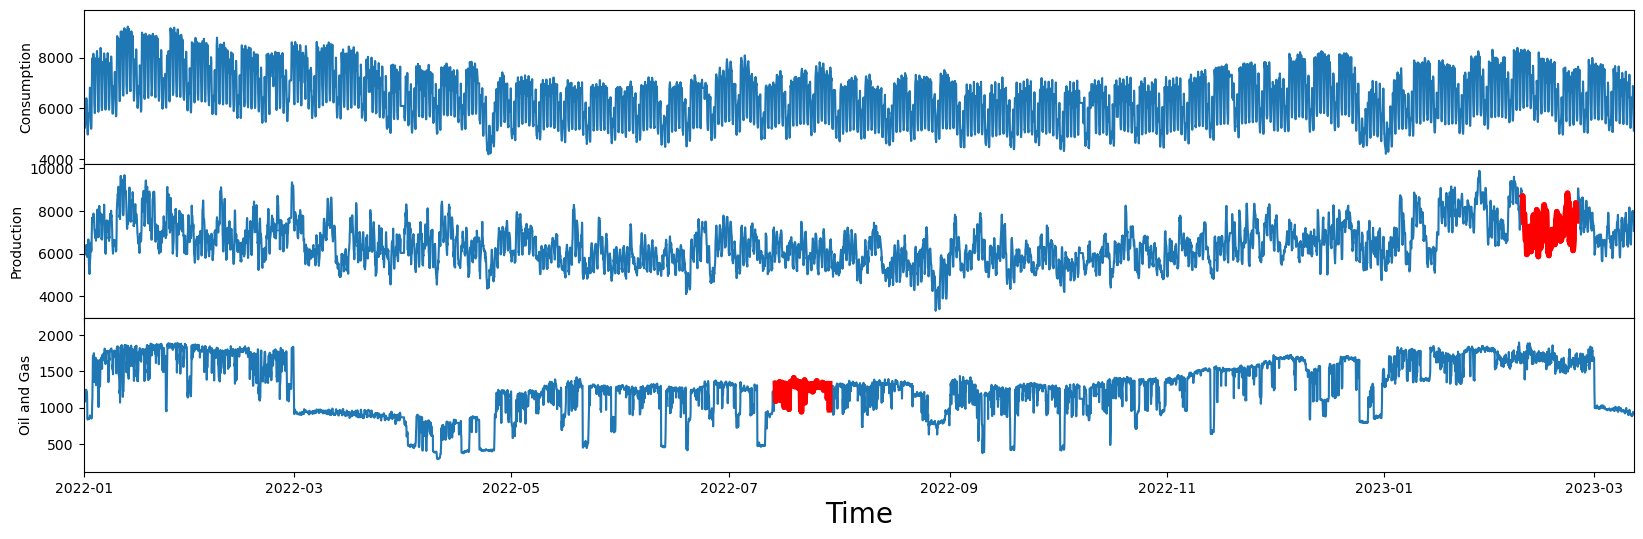

In [47]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='10')
    axs[i].plot(dfplt[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].set_xlim(x_min, x_max)
    for idx in discords_idx[dim_name]:
        axs[i].plot(dfm[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')
plt.show()

In [48]:
m = 720 #one month
mps = {}  
discords_idx = {}  
for dim_name in dfplt.columns:
    mps[dim_name] = stumpy.stump(dfm[dim_name], m)
    discords_distance = np.round(mps[dim_name][:, 0].max(), 1)
    discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]
    print(f"The discords pair matrix profile value in {dim_name} is {discords_distance}")

The discords pair matrix profile value in Consumption is 18.4
The discords pair matrix profile value in Production is 26.1
The discords pair matrix profile value in Oil and Gas is 31.1


In [49]:
#2022
x_min = pd.Timestamp('2022-01-01')
x_max = pd.Timestamp('2023-03-12')

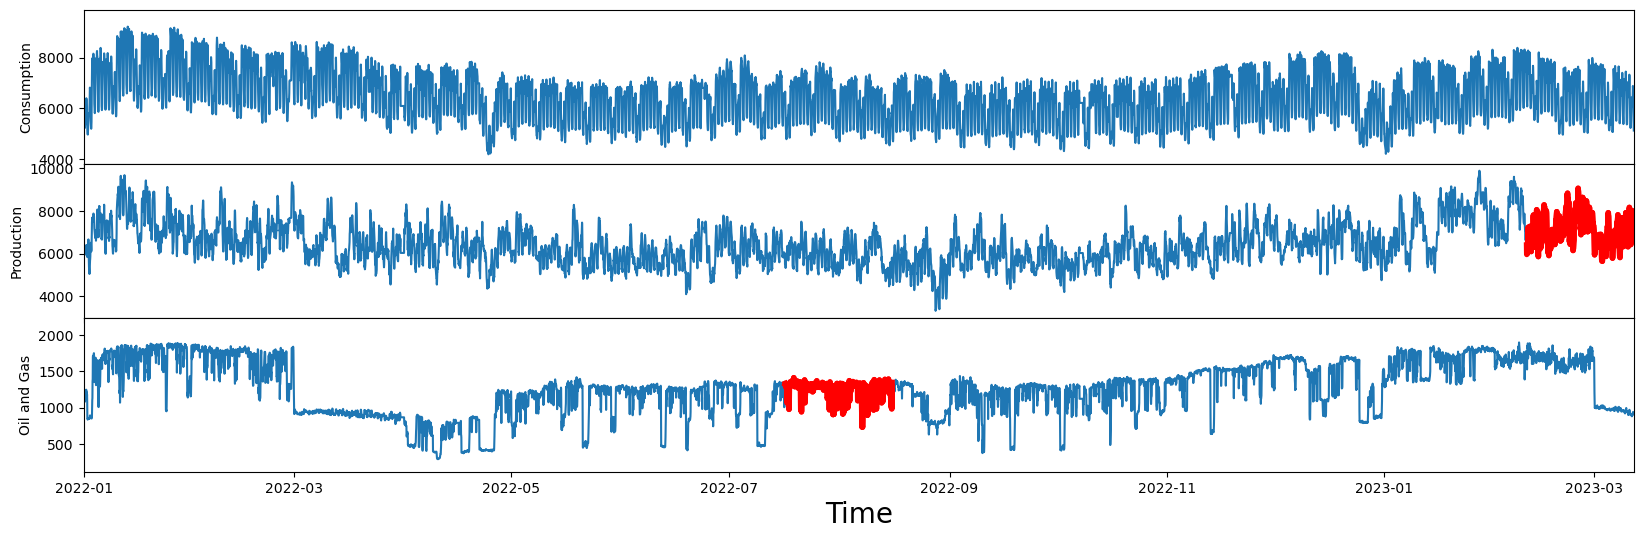

In [50]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='10')
    axs[i].plot(dfplt[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].set_xlim(x_min, x_max)
    for idx in discords_idx[dim_name]:
        axs[i].plot(dfm[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')
plt.show()

# Statsmodels


In [51]:
df_hdr = df.copy()

In [52]:
#2023
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

[Text(0, 0.5, 'Hydroelectric')]

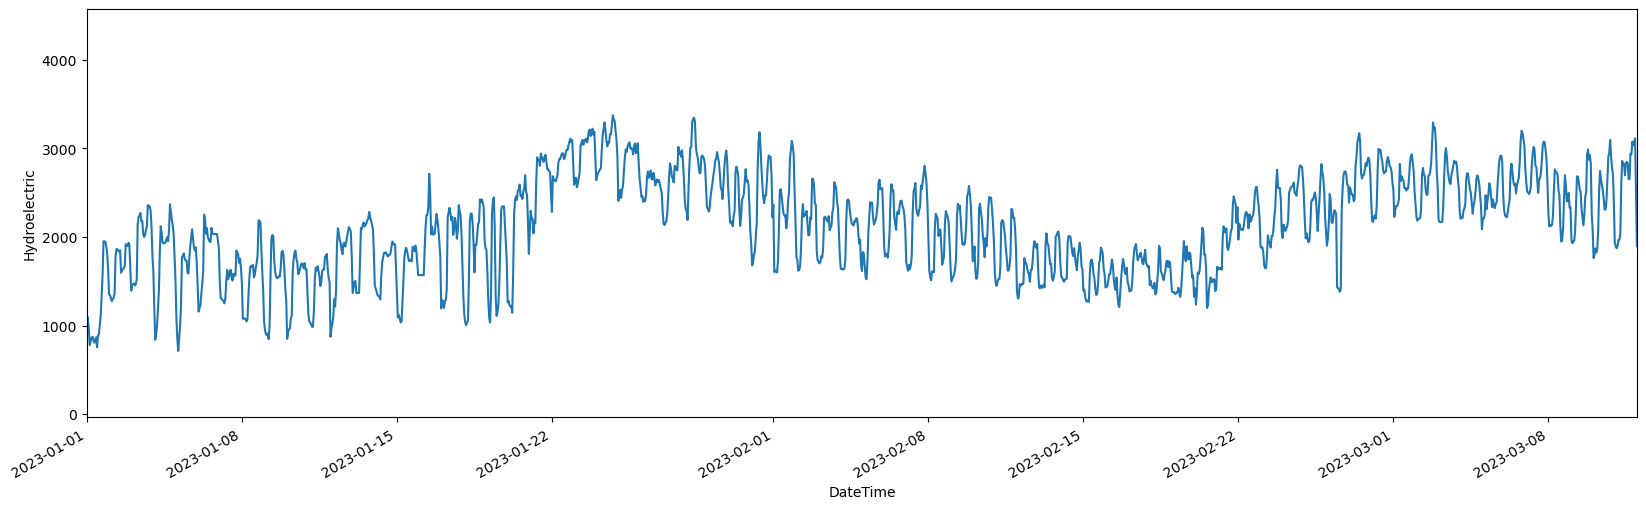

In [53]:
ax = df_hdr['Hydroelectric'].plot()
ax.set_xlim(x_min, x_max)
#ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Hydroelectric')

In [54]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [55]:
hdr_cycle, hdr_trend = hpfilter(df_hdr['Hydroelectric'], lamb=1600)

In [56]:
hdr_cycle

DateTime
2019-01-01 00:00:00    250.847881
2019-01-01 01:00:00    -31.072076
2019-01-01 02:00:00   -124.148813
2019-01-01 03:00:00   -193.519689
2019-01-01 04:00:00   -217.244473
                          ...    
2023-03-12 19:00:00    377.306923
2023-03-12 20:00:00    248.002644
2023-03-12 21:00:00    175.158428
2023-03-12 22:00:00     32.700716
2023-03-12 23:00:00   -325.553525
Name: Hydroelectric_cycle, Length: 36772, dtype: float64

In [57]:
df_hdr['Hdr Trend'] = hdr_trend

(19358.0, 19428.0)

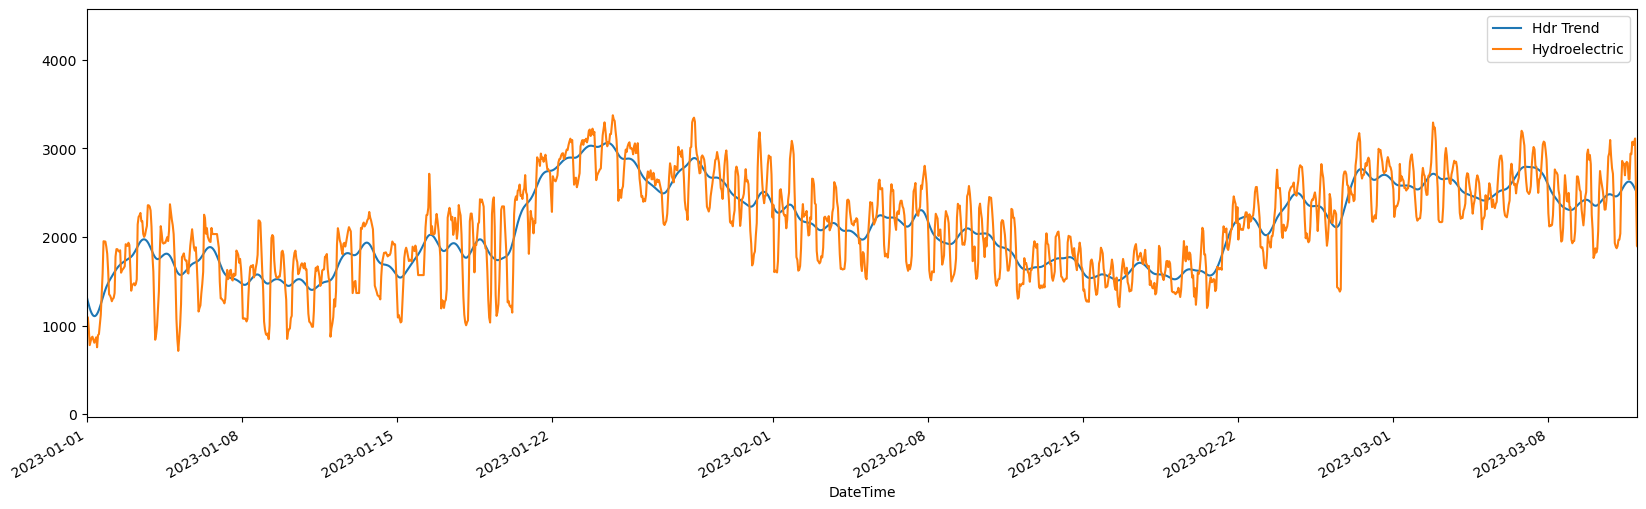

In [58]:
df_hdr[['Hdr Trend','Hydroelectric']].plot().set_xlim(x_min, x_max)

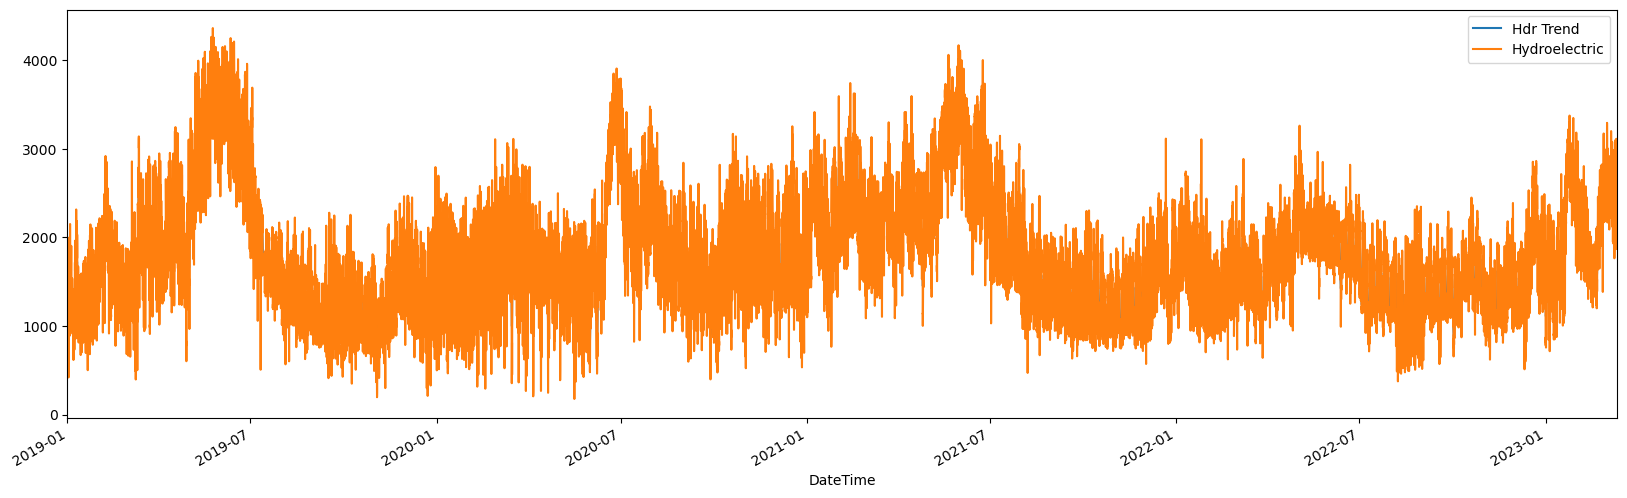

In [59]:
df_hdr[['Hdr Trend','Hydroelectric']].plot().autoscale(axis='x',tight=True)

# ETS
## Error/Trend/Seasonality Models for Hydroelectric

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

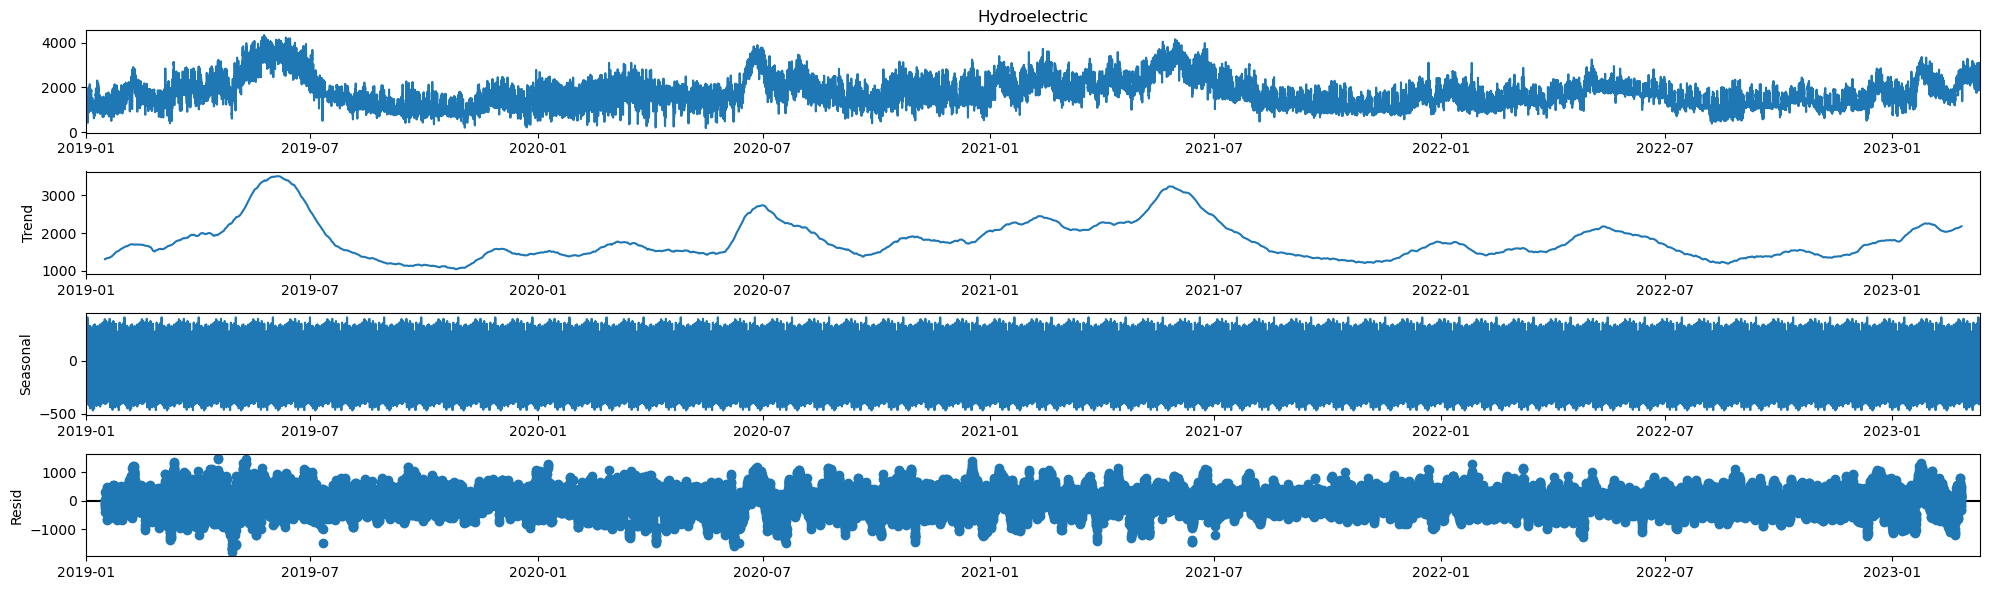

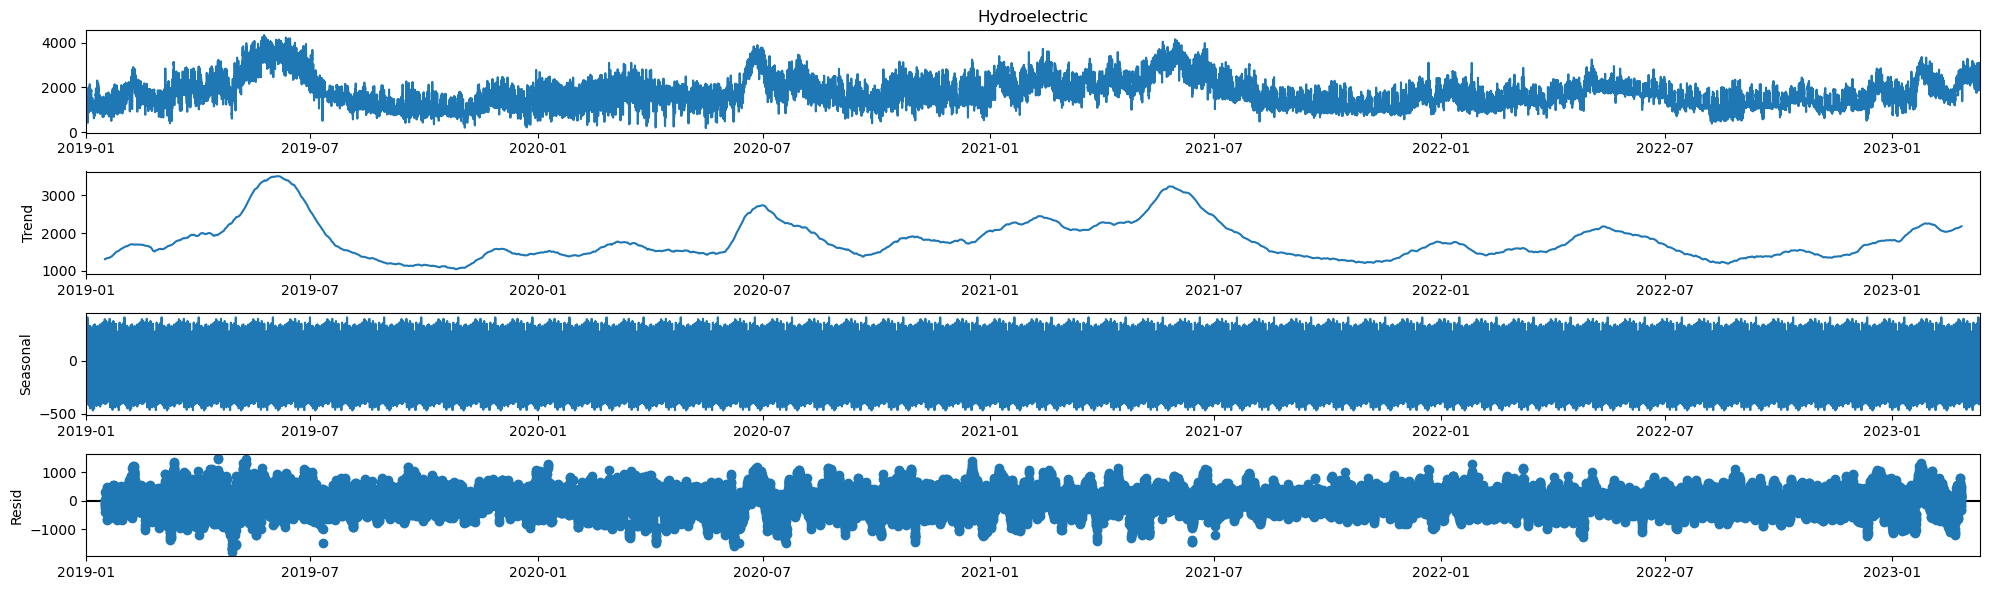

In [61]:
seas_hdr = seasonal_decompose(df_hdr["Hydroelectric"], model='additive' , period=720)
seas_hdr.plot()

# SMA 
## Simple Moving Average for Wind

In [62]:
df_wnd = df.copy()

df_wnd["Wnd Daily"] = df_wnd["Wind"].rolling(window = 24).mean() # one day
df_wnd["Wnd Weekly"] = df_wnd["Wind"].rolling(window = 168).mean() # one week

In [63]:
df_wnd.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time,Wnd Daily,Wnd Weekly
DateTime,,,,,,,,,,,,,
2019-01-01 00:00:00,6352.0,6527.0,1395.0,79.0,1383.0,1896.0,1744.0,0.0,30.0,2019-01-01,00:00:00,NaN,NaN
2019-01-01 01:00:00,6116.0,5701.0,1393.0,96.0,1112.0,1429.0,1641.0,0.0,30.0,2019-01-01,01:00:00,NaN,NaN
2019-01-01 02:00:00,5873.0,5676.0,1393.0,142.0,1030.0,1465.0,1616.0,0.0,30.0,2019-01-01,02:00:00,NaN,NaN
2019-01-01 03:00:00,5682.0,5603.0,1397.0,191.0,972.0,1455.0,1558.0,0.0,30.0,2019-01-01,03:00:00,NaN,NaN
2019-01-01 04:00:00,5557.0,5454.0,1393.0,159.0,960.0,1454.0,1458.0,0.0,30.0,2019-01-01,04:00:00,NaN,NaN


In [64]:
df_wnd.keys()

Index(['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric',
       'Oil and Gas', 'Coal', 'Solar', 'Biomass', 'Date', 'Time', 'Wnd Daily',
       'Wnd Weekly'],
      dtype='object')

In [65]:
df_sma = df_wnd[['Wind','Wnd Daily','Wnd Weekly']]

In [66]:
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

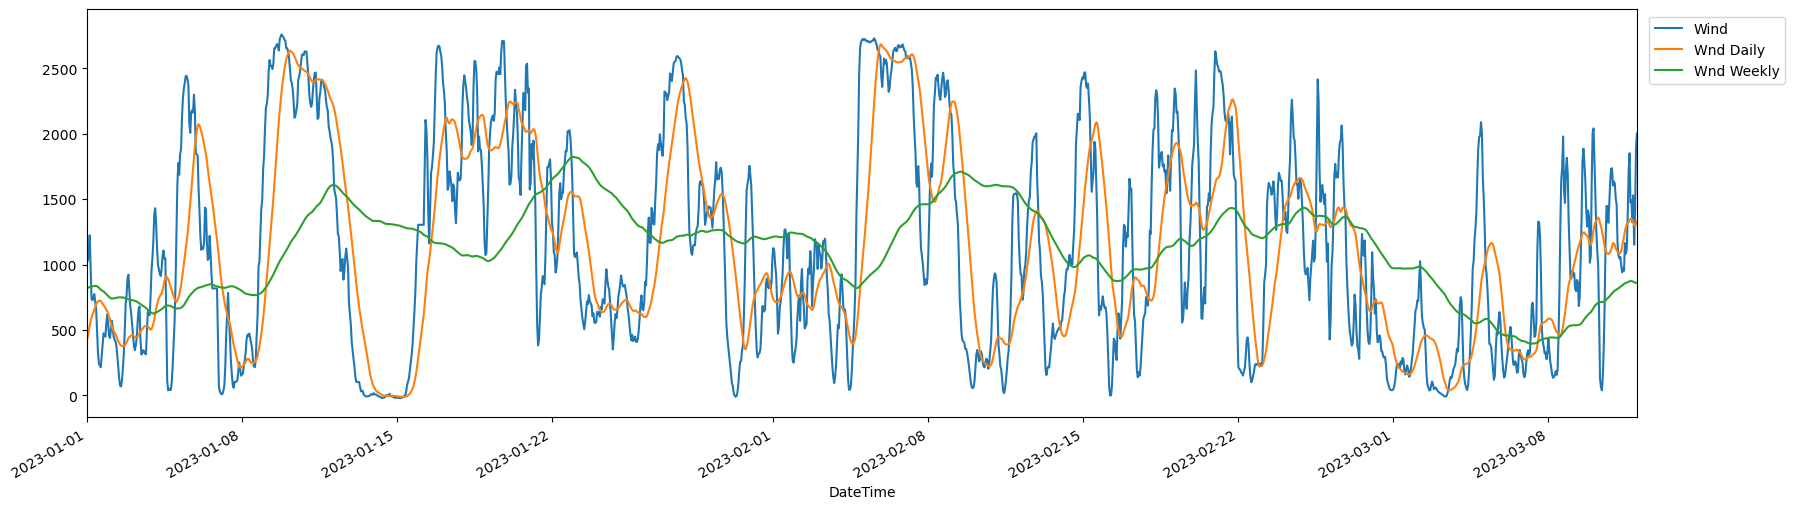

In [67]:
#df_sma.plot().set_xlim(x_min, x_max)


ax = df_sma.plot()
ax.set_xlim(x_min, x_max)
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.9))

## Augmented Dickey-Fuller Test

In [68]:
from statsmodels.tsa.stattools import adfuller,grangercausalitytests
#levinson_durbin,kpss,coint,bds,q_stat

In [69]:
print('Augmented Dickey-Fuller Test on Wind Production')
dftest = adfuller(df_wnd['Wind'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Wind Production


(-18.698564480230136,
 2.0375087156250872e-30,
 50,
 36721,
 {'1%': -3.4305280931124296,
  '5%': -2.8616187128708797,
  '10%': -2.5668118963670854},
 458576.6154862776)

In [70]:
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

ADF test statistic     -1.869856e+01
p-value                 2.037509e-30
# lags used             5.000000e+01
# observations          3.672100e+04
critical value (1%)    -3.430528e+00
critical value (5%)    -2.861619e+00
critical value (10%)   -2.566812e+00
dtype: float64


In [71]:
df_wnd.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time,Wnd Daily,Wnd Weekly
DateTime,,,,,,,,,,,,,
2019-01-01 00:00:00,6352.0,6527.0,1395.0,79.0,1383.0,1896.0,1744.0,0.0,30.0,2019-01-01,00:00:00,NaN,NaN
2019-01-01 01:00:00,6116.0,5701.0,1393.0,96.0,1112.0,1429.0,1641.0,0.0,30.0,2019-01-01,01:00:00,NaN,NaN
2019-01-01 02:00:00,5873.0,5676.0,1393.0,142.0,1030.0,1465.0,1616.0,0.0,30.0,2019-01-01,02:00:00,NaN,NaN
2019-01-01 03:00:00,5682.0,5603.0,1397.0,191.0,972.0,1455.0,1558.0,0.0,30.0,2019-01-01,03:00:00,NaN,NaN
2019-01-01 04:00:00,5557.0,5454.0,1393.0,159.0,960.0,1454.0,1458.0,0.0,30.0,2019-01-01,04:00:00,NaN,NaN


## Granger Causality Tests

In [72]:
grangercausalitytests(df_wnd[['Wind','Production']],maxlag=24);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=75.1560 , p=0.0000  , df_denom=36768, df_num=1
ssr based chi2 test:   chi2=75.1621 , p=0.0000  , df=1
likelihood ratio test: chi2=75.0854 , p=0.0000  , df=1
parameter F test:         F=75.1560 , p=0.0000  , df_denom=36768, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=166.5436, p=0.0000  , df_denom=36765, df_num=2
ssr based chi2 test:   chi2=333.1326, p=0.0000  , df=2
likelihood ratio test: chi2=331.6325, p=0.0000  , df=2
parameter F test:         F=166.5436, p=0.0000  , df_denom=36765, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=114.0912, p=0.0000  , df_denom=36762, df_num=3
ssr based chi2 test:   chi2=342.3387, p=0.0000  , df=3
likelihood ratio test: chi2=340.7549, p=0.0000  , df=3
parameter F test:         F=114.0912, p=0.0000  , df_denom=36762, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=84.1600 

## EWMA : Exponentially Weighted Moving Average

In [73]:
df_wnd["Wnd EWMA"] = df_wnd["Wind"].ewm(span=24,adjust=False).mean()

(19358.0, 19428.0)

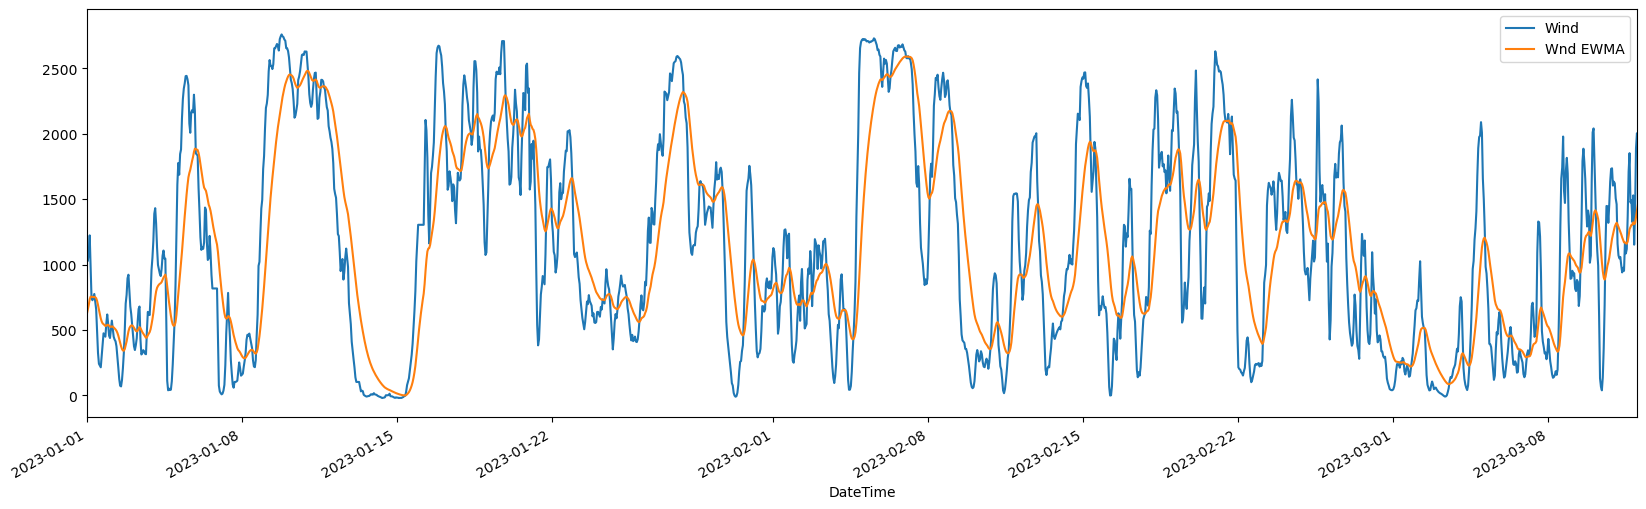

In [74]:
df_wnd[[ "Wind","Wnd EWMA"]].plot().set_xlim(x_min, x_max)

(19358.0, 19428.0)

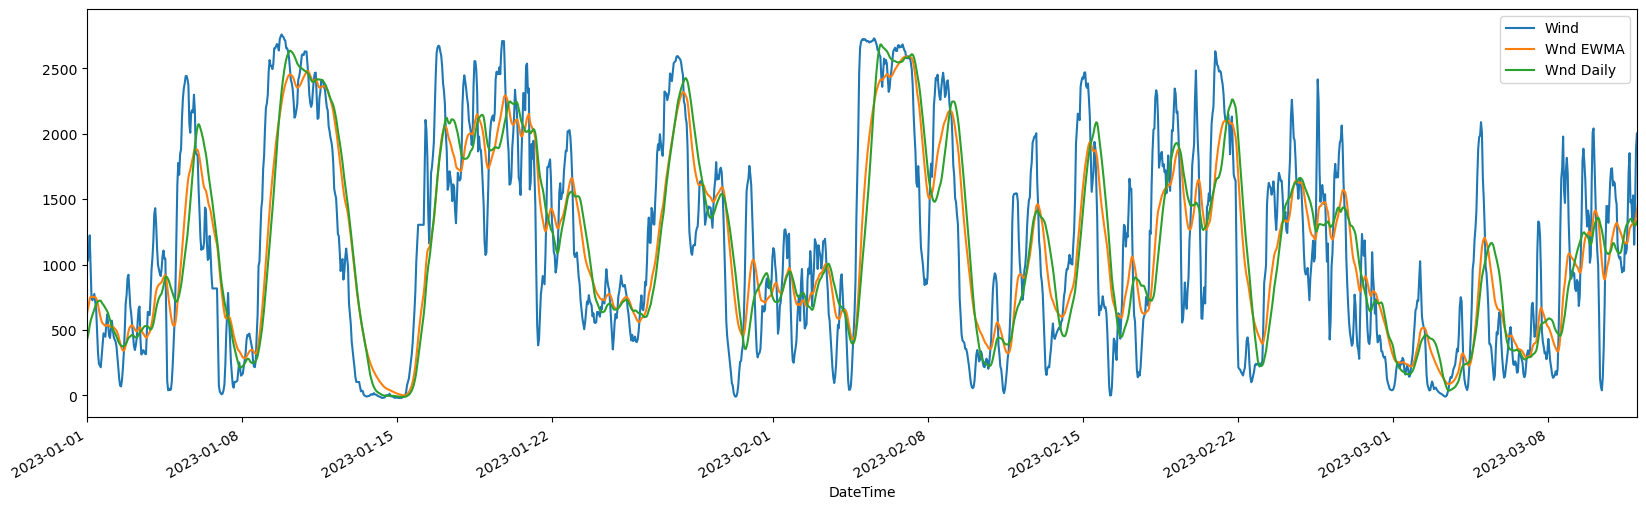

In [75]:
df_wnd[["Wind", "Wnd EWMA", 'Wnd Daily']].plot().set_xlim(x_min, x_max)